In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os


**Data**

In [1]:
# Download download Tiny ImageNet directly into your Jupyter Notebook

import os
import requests
import zipfile

# set directory and download URL
url = "http://cs231n.stanford.edu/tiny-imagenet-200.zip"
output_dir = "tiny-imagenet-200"
zip_filename = "tiny-imagenet-200.zip"

# download zip file if it doesn't exist
if not os.path.exists(zip_filename):
    print("Downloading Tiny ImageNet...")
    r = requests.get(url, stream=True)
    with open(zip_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
    print("Download complete.")

# unzip if not already extracted
if not os.path.exists(output_dir):
    print("Extracting zip file...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall()
    print("Extraction complete.")
else:
    print("Already extracted.")



Download complete.
Extracting zip file...
Extraction complete.


In [9]:
# Create B&W dataset

def convert_to_grayscale(input_folder, grayscale_output_folder):
    os.makedirs(grayscale_output_folder, exist_ok=True)
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png')):
            img = Image.open(os.path.join(input_folder, filename)).convert('RGB')
            gray = img.convert('L')  # 'L' mode = grayscale
            gray.save(os.path.join(grayscale_output_folder, filename))

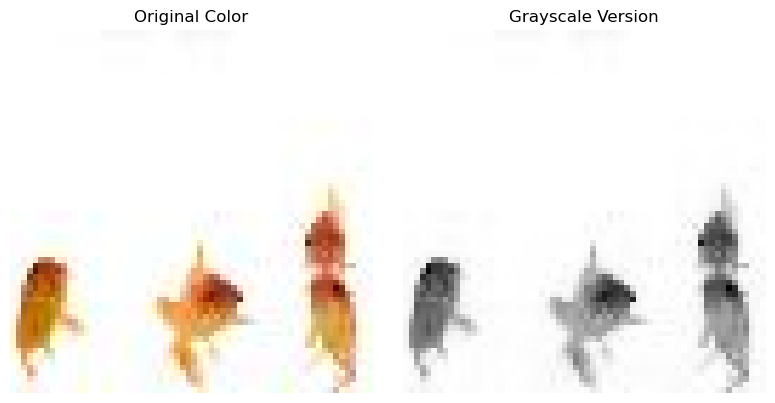

In [16]:
# Choose a sample image from Tiny ImageNet
sample_img_path = os.path.join("tiny-imagenet-200", "train", "n01443537", "images")
sample_img = os.listdir(sample_img_path)[0]
full_img_path = os.path.join(sample_img_path, sample_img)

# Load images
img_color = Image.open(full_img_path).convert('RGB')
img_gray = img_color.convert('L')

# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(img_color)
axs[0].set_title("Original Color")
axs[0].axis('off')

axs[1].imshow(img_gray, cmap='gray')
axs[1].set_title("Grayscale Version")
axs[1].axis('off')

plt.tight_layout()
plt.show()


*Save grayscale versions of the Tiny ImageNet training images, saved in a parallel folder structure alongside the originals so you can feed them into your CNN as input while the color versions serve as targets*

In [19]:
#CONTINUE HERE!
# Paths
original_base = "tiny-imagenet-200/train"
grayscale_base = "tiny-imagenet-200-grayscale/train"

# Create root grayscale directory
os.makedirs(grayscale_base, exist_ok=True)

# Loop through all classes
for class_name in os.listdir(original_base):
    class_path = os.path.join(original_base, class_name, "images")
    if not os.path.isdir(class_path):
        continue

    # Create corresponding grayscale folder
    gray_class_path = os.path.join(grayscale_base, class_name, "images")
    os.makedirs(gray_class_path, exist_ok=True)

    # Convert and save each image
    for img_name in os.listdir(class_path):
        orig_img_path = os.path.join(class_path, img_name)
        gray_img_path = os.path.join(gray_class_path, img_name)

        try:
            img = Image.open(orig_img_path).convert('L')  # grayscale
            img.save(gray_img_path)
        except Exception as e:
            print(f"Error processing {img_name}: {e}")

print("grayscale copies created.")


grayscale copies created.
